<a href="https://colab.research.google.com/github/divyanshgaur/Object-detection/blob/master/Structured_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from google.colab import files
files.upload()

Saving dataset.csv.txt to dataset.csv.txt


{'dataset.csv.txt': b"State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?\r\nKS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,197.400000,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.\r\nOH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,195.500000,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.\r\nNJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,121.200000,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.\r\nOH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,61.900000,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.\r\nOK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,148.300000,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.\r\nAL,118,510,391-8027,yes,no,0,223.400000,98,37.980000,220.600000,101,18.750000,

In [5]:
churn=pd.read_csv('dataset.csv.txt',sep=',')

In [6]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
print(churn.describe())

       Account Length    Area Code  ...  Intl Charge  CustServ Calls
count     3333.000000  3333.000000  ...  3333.000000     3333.000000
mean       101.064806   437.182418  ...     2.764581        1.562856
std         39.822106    42.371290  ...     0.753773        1.315491
min          1.000000   408.000000  ...     0.000000        0.000000
25%         74.000000   408.000000  ...     2.300000        1.000000
50%        101.000000   415.000000  ...     2.780000        1.000000
75%        127.000000   510.000000  ...     3.270000        2.000000
max        243.000000   510.000000  ...     5.400000        9.000000

[8 rows x 16 columns]


In [8]:
churn_target=churn['Churn?'] 
print(churn_target)

0       False.
1       False.
2       False.
3       False.
4       False.
         ...  
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object


In [9]:
#Phone number : unique number (might not influence prediction)
#Churn? : target variable (not required in feature set)
cols_to_drop = ['Phone','Churn?']
#axis=1 depicts drop along columns
churn_feature = churn.drop(cols_to_drop,axis=1)
print(churn_feature)

     State  Account Length  Area Code  ... Intl Calls Intl Charge  CustServ Calls
0       KS             128        415  ...          3        2.70               1
1       OH             107        415  ...          3        3.70               1
2       NJ             137        415  ...          5        3.29               0
3       OH              84        408  ...          7        1.78               2
4       OK              75        415  ...          3        2.73               3
...    ...             ...        ...  ...        ...         ...             ...
3328    AZ             192        415  ...          6        2.67               2
3329    WV              68        415  ...          4        2.59               3
3330    RI              28        510  ...          6        3.81               2
3331    CT             184        510  ...         10        1.35               2
3332    TN              74        415  ...          4        3.70               0

[3333 rows x 19

In [10]:
churn_categorical = churn.select_dtypes(include=[object])
print(churn_categorical)

     State     Phone Int'l Plan VMail Plan  Churn?
0       KS  382-4657         no        yes  False.
1       OH  371-7191         no        yes  False.
2       NJ  358-1921         no         no  False.
3       OH  375-9999        yes         no  False.
4       OK  330-6626        yes         no  False.
...    ...       ...        ...        ...     ...
3328    AZ  414-4276         no        yes  False.
3329    WV  370-3271         no         no  False.
3330    RI  328-8230         no         no  False.
3331    CT  364-6381        yes         no  False.
3332    TN  400-4344         no        yes  False.

[3333 rows x 5 columns]


In [11]:
#Changing the 'yes or no' values to boolean
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feature[yes_no_cols] = churn_feature[yes_no_cols] == 'yes'
print(churn_feature)

     State  Account Length  Area Code  ...  Intl Calls  Intl Charge  CustServ Calls
0       KS             128        415  ...           3         2.70               1
1       OH             107        415  ...           3         3.70               1
2       NJ             137        415  ...           5         3.29               0
3       OH              84        408  ...           7         1.78               2
4       OK              75        415  ...           3         2.73               3
...    ...             ...        ...  ...         ...          ...             ...
3328    AZ             192        415  ...           6         2.67               2
3329    WV              68        415  ...           4         2.59               3
3330    RI              28        510  ...           6         3.81               2
3331    CT             184        510  ...          10         1.35               2
3332    TN              74        415  ...           4         3.70         

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
churn_feature['Area Code'] = label_encoder.fit_transform(churn_feature['Area Code'])
print(churn_feature)

     State  Account Length  Area Code  ...  Intl Calls  Intl Charge  CustServ Calls
0       KS             128          1  ...           3         2.70               1
1       OH             107          1  ...           3         3.70               1
2       NJ             137          1  ...           5         3.29               0
3       OH              84          0  ...           7         1.78               2
4       OK              75          1  ...           3         2.73               3
...    ...             ...        ...  ...         ...          ...             ...
3328    AZ             192          1  ...           6         2.67               2
3329    WV              68          1  ...           4         2.59               3
3330    RI              28          2  ...           6         3.81               2
3331    CT             184          2  ...          10         1.35               2
3332    TN              74          1  ...           4         3.70         

In [13]:
print('Churn data size before one hot encoding',churn_feature.shape)
print('No of unique states',len(churn_feature['State'].unique()))
#Give the feature and columns to one hot encode in 'columns' and column rename prefix in 'prefix'
churn_dumm=pd.get_dummies(churn_feature, columns=["State"], prefix=["State"])
print('Churn data size after one hot encoding',churn_dumm.shape)
import numpy as np #converting to numpy matrix
churn_matrix = churn_dumm.values.astype(np.float)

Churn data size before one hot encoding (3333, 19)
No of unique states 51
Churn data size after one hot encoding (3333, 69)


###Imputing NaN values

In [14]:
from sklearn.impute import SimpleImputer
#Missing values replaced by mean
imp=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None,verbose=0,copy=True)
#Fit to data, then transform it.
churn_matrix=imp.fit_transform(churn_matrix)

# Standard Scaling

####Standardization is a technique for re-scaling variable to a mean of zero and standard deviation of one.

In [15]:
from sklearn.preprocessing import StandardScaler
#Standardize the data by removing the mean and scaling to unit variance
scaler = StandardScaler()
#Fit to data, then transform it.
churn_matrix = scaler.fit_transform(churn_matrix)

#Classification step

In [16]:
seed=7 #To generate same sequence of random numbers
from sklearn.model_selection import train_test_split
#Splitting the data for training and testing(90% train,10% test)
train_data,test_data, train_label, test_label = train_test_split(churn_matrix, churn_target, test_size=.1,random_state=seed)

###Desicion Tree
The decision tree model predicts the class/target by learning simple decision rules from the features of the data.

In [17]:
from sklearn.tree import DecisionTreeClassifier
#Initializing decision tree classifier
classifier=DecisionTreeClassifier(random_state=seed)
#Model training
classifier = classifier.fit(train_data, train_label)
#After being fitted, the model can then be used to predict the output.
churn_predicted_target=classifier.predict(test_data)
#Evaluating the classifier
score = classifier.score(test_data, test_label)
print('Decision Tree Classifier : ',score)

Decision Tree Classifier :  0.9101796407185628


###Naive Bayes
In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('Naive Bayes : ',score)

Naive Bayes :  0.5748502994011976


###SGD 

In [19]:
from sklearn.linear_model import SGDClassifier
classifier =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('SGD classifier : ',score)

SGD classifier :  0.781437125748503


###SVM

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", C=0.025,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('SVM Classifier : ',score)

SVM Classifier :  0.8473053892215568


###Random Forest
A random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy.

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10,random_state=seed)
classifier = classifier.fit(train_data, train_label)
churn_predicted_target=classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('Random Forest Classifier : ',score)

Random Forest Classifier :  0.8682634730538922


#Model Tuning
The classification algorithms in machine learning are parameterized. Modification of any of those parameters can influence the results. So algorithm/model tuning is very essential to find out the best model.

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=15, max_features=60,random_state=seed)
classifier = classifier.fit(train_data, train_label)
score=classifier.score(test_data, test_label)
print('Random Forest classification after model tuning',score)

Random Forest classification after model tuning 0.937125748502994


#Cross-Validation
##Stratified Shuffle Split
The StratifiedShuffleSplit splits the data by taking equal number of samples from each class in a random manner.

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1, random_state=7)
sss.get_n_splits(churn_matrix,churn_target)
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=7, test_size=0.1,
            train_size=None)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
classifiers = [
    DecisionTreeClassifier(),
    GaussianNB(),
    SGDClassifier(loss='modified_huber', shuffle=True),
    SVC(kernel="linear", C=0.025),
    KNeighborsClassifier(),
    OneVsRestClassifier(svm.LinearSVC()),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10),
    AdaBoostClassifier(),
   ]
for clf in classifiers:
    score=0
    for train_index, test_index in sss.split(churn_matrix,churn_target):
        X_train, X_test = churn_matrix[train_index], churn_matrix[test_index]
        y_train, y_test = churn_target[train_index], churn_target[test_index]
        clf.fit(X_train, y_train)
        score=score+clf.score(X_test, y_test)
    print(score)


0.8862275449101796
0.6137724550898204
0.811377245508982
0.8562874251497006
0.8652694610778443


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8652694610778443
0.8862275449101796
0.8832335329341318


#Classification Accuracy

In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy Score',accuracy_score(test_label,churn_predicted_target))  

Accuracy Score 0.8682634730538922


##Confusion Matrix
It visually depicts the performance in a tabular form that has 2 dimensions namely “actual” and “predicted” sets of data.

The rows and columns of the table shows the count of false positives, false negatives, true positives and true negatives.

In [26]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix',confusion_matrix(test_label,churn_predicted_target))

Confusion Matrix [[282   1]
 [ 43   8]]


Saving CM.jpeg to CM.jpeg


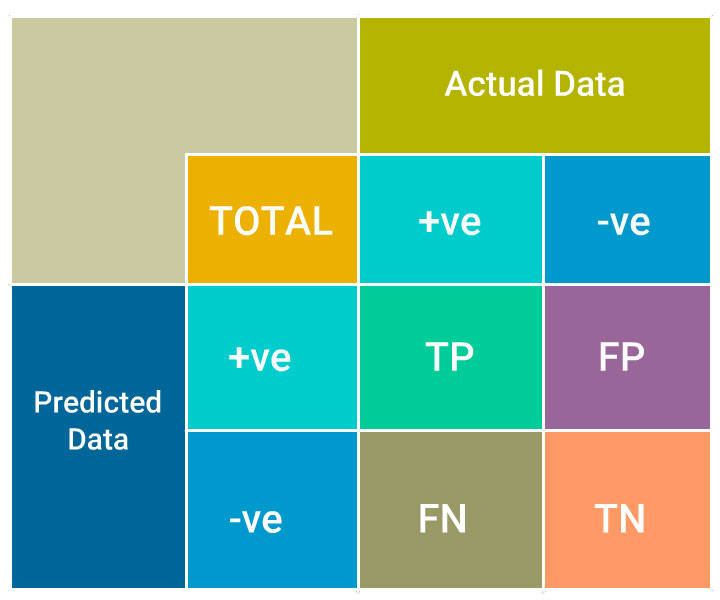

In [27]:
from google.colab import files
files.upload()
from IPython.display import Image
Image('CM.jpeg')

TP (True Positive) - The number of correct predictions that the occurrence is positive

FP (False Positive) - The number of incorrect predictions that the occurrence is positive

FN (False Negative) - The number of incorrect predictions that the occurrence is negative

TN (True Negative)- The number of correct predictions that the occurrence is negative

TOTAL - The total number of occurrence

Confusion matrix, without normalization
[[286   0]
 [ 48   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


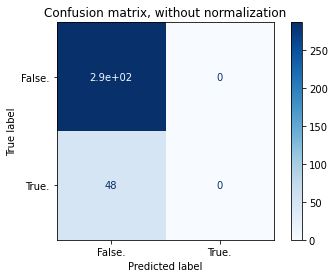

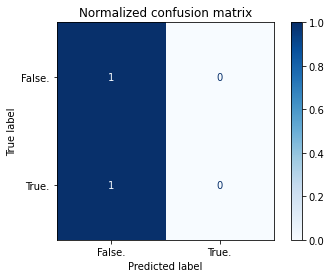

In [29]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
X = churn_matrix
y = churn_target
#class_names = iris.target_names

# Split the data into a training set and a test set
train_data,test_data, train_label, test_label = train_test_split(churn_matrix, churn_target, test_size=.1,random_state=seed)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

###Classification Report 
Precision

When a positive value is predicted, how often is the prediction correct?
Recall

It is the true positive rate.

When the actual value is positive, how often is the prediction correct?

In [30]:
from sklearn.metrics import classification_report
target_names = ['False.', 'True.']
print(classification_report(test_label, churn_predicted_target, target_names=target_names))

              precision    recall  f1-score   support

      False.       0.87      1.00      0.93       283
       True.       0.89      0.16      0.27        51

    accuracy                           0.87       334
   macro avg       0.88      0.58      0.60       334
weighted avg       0.87      0.87      0.83       334

